# Wind Turbine Energy Output Prediction
## Weather-Based Prediction: A Next-Generation Approach to Renewable Energy Management

This notebook demonstrates the complete workflow for predicting wind turbine energy output based on weather conditions.

### Project Objectives:
1. **Energy Production Forecasting** - Predict energy output based on weather forecasts
2. **Maintenance Planning** - Schedule maintenance during low wind activity periods
3. **Grid Integration** - Balance grid by predicting wind energy availability

## Step 1: Import Libraries
Import all necessary libraries for data processing, visualization, and machine learning.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Persistence
import pickle

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Step 2: Data Collection - Load Dataset
Load the wind turbine dataset and drop the Date/Time column.

In [2]:
# Load CSV without parsing dates to avoid errors
df = pd.read_csv('T1.csv', low_memory=False)

# Drop Date/Time column if it exists (not useful for prediction)
if 'Date/Time' in df.columns:
    df = df.drop(columns=['Date/Time'])
    print("✓ Dropped 'Date/Time' column (not needed for prediction)")

print(f"✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
df.head()

✓ Dropped 'Date/Time' column (not needed for prediction)
✓ Dataset loaded: 50530 rows, 4 columns

Column names: ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

First 5 rows:


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645905,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286


## Step 3: Data Preprocessing - Check for Null Values

In [3]:
# Check for null values
print("Null Values Count:")
null_counts = df.isnull().sum()
print(null_counts)

if null_counts.sum() == 0:
    print("\n✓ No null values found!")
else:
    print(f"\n⚠ Found {null_counts.sum()} null values")

# Display percentage of null values
print("\nNull Values Percentage:")
print((df.isnull().sum() / len(df)) * 100)

Null Values Count:
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

✓ No null values found!

Null Values Percentage:
LV ActivePower (kW)              0.0
Wind Speed (m/s)                 0.0
Theoretical_Power_Curve (KWh)    0.0
Wind Direction (°)               0.0
dtype: float64


## Step 4: Handle Missing Data
Take care of missing data using appropriate strategies.

In [4]:
# Store original shape
original_shape = df.shape

# Fill with median for numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"✓ Filled {col} with median value")

# Fill with mode for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"✓ Filled {col} with mode value")

print(f"\n✓ Data shape maintained: {df.shape}")


✓ Data shape maintained: (50530, 4)


## Step 5: Exploratory Data Analysis (EDA)
### Statistical Summary

In [5]:
# Display statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


## Step 6: Data Visualization - Correlation Analysis


Correlation Matrix:
                               LV ActivePower (kW)  Wind Speed (m/s)  \
LV ActivePower (kW)                       1.000000          0.912774   
Wind Speed (m/s)                          0.912774          1.000000   
Theoretical_Power_Curve (KWh)             0.949918          0.944209   
Wind Direction (°)                       -0.062702         -0.077188   

                               Theoretical_Power_Curve (KWh)  \
LV ActivePower (kW)                                 0.949918   
Wind Speed (m/s)                                    0.944209   
Theoretical_Power_Curve (KWh)                       1.000000   
Wind Direction (°)                                 -0.099076   

                               Wind Direction (°)  
LV ActivePower (kW)                     -0.062702  
Wind Speed (m/s)                        -0.077188  
Theoretical_Power_Curve (KWh)           -0.099076  
Wind Direction (°)                       1.000000  


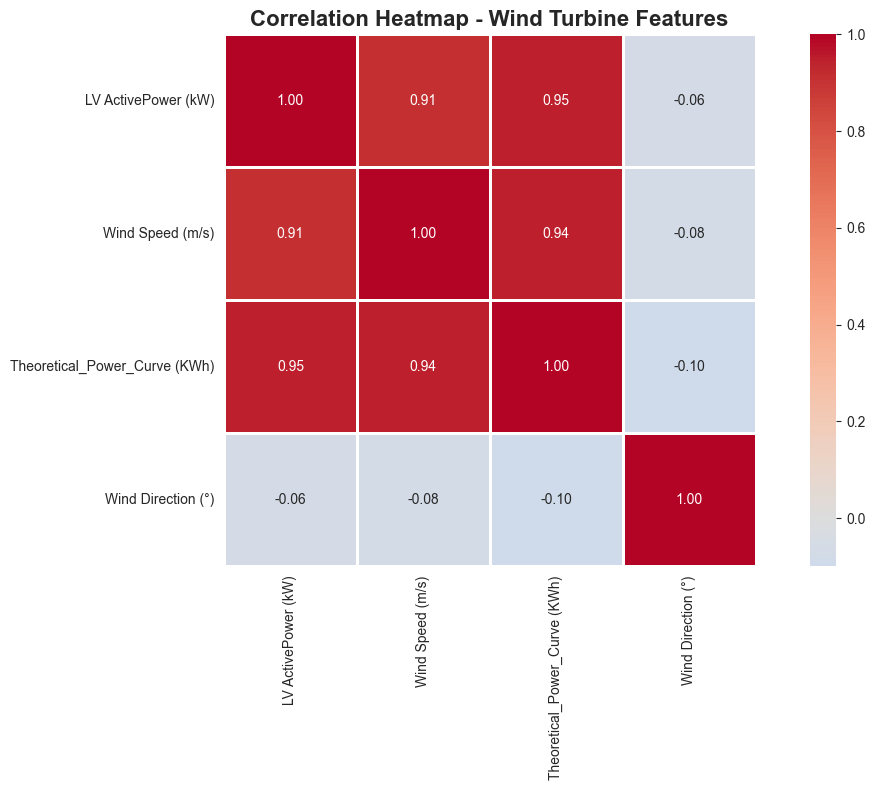


✓ Correlation heatmap saved as 'correlation_heatmap.png'

Key Insights:
- Strong positive correlation indicates features move together
- Wind Direction typically shows weak correlation with Power Generated
- Wind Speed shows strong positive correlation with Power Output


In [6]:
# Calculate correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Heatmap - Wind Turbine Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Correlation heatmap saved as 'correlation_heatmap.png'")
print("\nKey Insights:")
print("- Strong positive correlation indicates features move together")
print("- Wind Direction typically shows weak correlation with Power Generated")
print("- Wind Speed shows strong positive correlation with Power Output")

## Step 7: Feature Engineering
### Identify Independent (X) and Dependent (y) Variables

In [7]:
# Define target column (last column by default)
target_column = df.columns[-1]
print(f"Target Variable: {target_column}")

# Select features and target
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Feature Variables: {X.columns.tolist()}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Handle categorical columns if any
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"\n✓ Encoding categorical columns: {categorical_cols.tolist()}")
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
else:
    print("✓ No categorical columns found - all features are numerical")

Target Variable: Wind Direction (°)
Feature Variables: ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)']
Features shape: (50530, 3)
Target shape: (50530,)
✓ No categorical columns found - all features are numerical


## Step 8: Feature Scaling
Normalize features for better model performance.

In [8]:
# Initialize StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("✓ Feature scaling completed using StandardScaler")
print("\nScaled Features - First 5 rows:")
print(X_scaled.head())

✓ Feature scaling completed using StandardScaler

Scaled Features - First 5 rows:
   LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)
0            -0.706800         -0.531476                      -0.786435
1            -0.650629         -0.446115                      -0.710712
2            -0.762932         -0.554021                      -0.805023
3            -0.676628         -0.449071                      -0.713483
4            -0.706340         -0.468406                      -0.731337


## Step 9: Train-Test Split
Split data into training (80%) and testing (20%) sets.

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"✓ Training set: {X_train.shape[0]} samples ({(X_train.shape[0]/len(df))*100:.1f}%)")
print(f"✓ Testing set: {X_test.shape[0]} samples ({(X_test.shape[0]/len(df))*100:.1f}%)")
print(f"\nFeatures: {X_train.shape[1]}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

✓ Training set: 40424 samples (80.0%)
✓ Testing set: 10106 samples (20.0%)

Features: 3
X_train shape: (40424, 3)
X_test shape: (10106, 3)


## Step 10: Model Building - Linear Regression

In [10]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Evaluate model
lr_train_r2 = r2_score(y_train, y_pred_lr_train)
lr_test_r2 = r2_score(y_test, y_pred_lr_test)
lr_mae = mean_absolute_error(y_test, y_pred_lr_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))

print("="*60)
print("LINEAR REGRESSION MODEL PERFORMANCE")
print("="*60)
print(f"Training R² Score: {lr_train_r2:.4f}")
print(f"Testing R² Score: {lr_test_r2:.4f}")
print(f"MAE: {lr_mae:.4f}")
print(f"RMSE: {lr_rmse:.4f}")
print("="*60)

LINEAR REGRESSION MODEL PERFORMANCE
Training R² Score: 0.0209
Testing R² Score: 0.0219
MAE: 83.0466
RMSE: 93.0174


## Step 11: Model Building - Random Forest Regression

In [11]:
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Evaluate model
rf_train_r2 = r2_score(y_train, y_pred_rf_train)
rf_test_r2 = r2_score(y_test, y_pred_rf_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

print("="*60)
print("RANDOM FOREST REGRESSION MODEL PERFORMANCE")
print("="*60)
print(f"Training R² Score: {rf_train_r2:.4f}")
print(f"Testing R² Score: {rf_test_r2:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print("="*60)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

RANDOM FOREST REGRESSION MODEL PERFORMANCE
Training R² Score: 0.3627
Testing R² Score: 0.0691
MAE: 76.2498
RMSE: 90.7449

Feature Importance:
                         Feature  Importance
1               Wind Speed (m/s)    0.496471
0            LV ActivePower (kW)    0.305186
2  Theoretical_Power_Curve (KWh)    0.198343


## Step 12: Model Building - Decision Tree Regression

In [12]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2
)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)

# Evaluate model
dt_train_r2 = r2_score(y_train, y_pred_dt_train)
dt_test_r2 = r2_score(y_test, y_pred_dt_test)
dt_mae = mean_absolute_error(y_test, y_pred_dt_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))

print("="*60)
print("DECISION TREE REGRESSION MODEL PERFORMANCE")
print("="*60)
print(f"Training R² Score: {dt_train_r2:.4f}")
print(f"Testing R² Score: {dt_test_r2:.4f}")
print(f"MAE: {dt_mae:.4f}")
print(f"RMSE: {dt_rmse:.4f}")
print("="*60)

DECISION TREE REGRESSION MODEL PERFORMANCE
Training R² Score: 0.2086
Testing R² Score: -0.0042
MAE: 78.1631
RMSE: 94.2506


## Step 13: Model Comparison
Compare all three models to select the best performer.

In [13]:
# Create comparison dataframe
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
    'Train R² Score': [lr_train_r2, rf_train_r2, dt_train_r2],
    'Test R² Score': [lr_test_r2, rf_test_r2, dt_test_r2],
    'MAE': [lr_mae, rf_mae, dt_mae],
    'RMSE': [lr_rmse, rf_rmse, dt_rmse]
})

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(model_comparison.to_string(index=False))
print("="*80)

# Identify best model based on Test R² Score
best_model_idx = model_comparison['Test R² Score'].idxmax()
best_model_name = model_comparison.loc[best_model_idx, 'Model']
best_r2 = model_comparison.loc[best_model_idx, 'Test R² Score']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test R² Score: {best_r2:.4f}")
print("="*80)


MODEL COMPARISON SUMMARY
            Model  Train R² Score  Test R² Score       MAE      RMSE
Linear Regression        0.020889       0.021924 83.046559 93.017433
    Random Forest        0.362746       0.069130 76.249806 90.744941
    Decision Tree        0.208640      -0.004182 78.163088 94.250615

🏆 BEST MODEL: Random Forest
   Test R² Score: 0.0691


### Visualization: Model Comparison

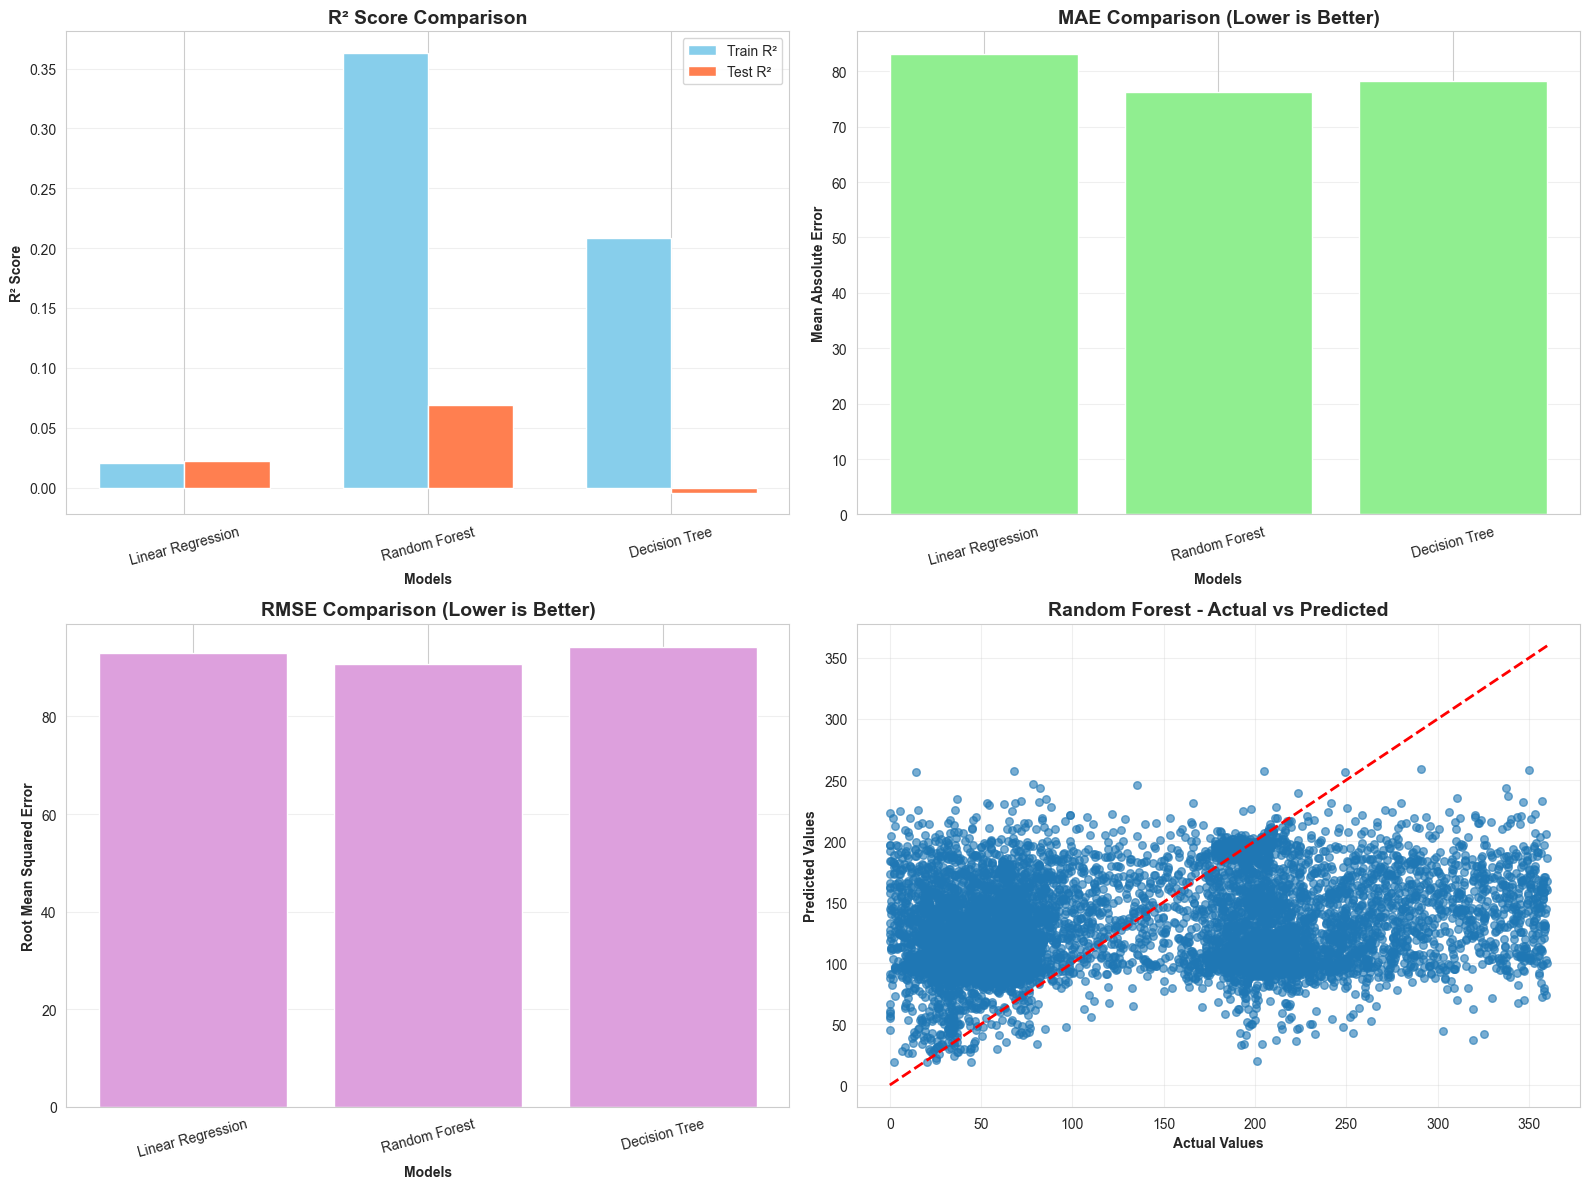

In [14]:
# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: R² Scores
x_pos = np.arange(len(model_comparison))
width = 0.35
axes[0, 0].bar(x_pos - width/2, model_comparison['Train R² Score'], width, label='Train R²', color='skyblue')
axes[0, 0].bar(x_pos + width/2, model_comparison['Test R² Score'], width, label='Test R²', color='coral')
axes[0, 0].set_xlabel('Models', fontweight='bold')
axes[0, 0].set_ylabel('R² Score', fontweight='bold')
axes[0, 0].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(model_comparison['Model'], rotation=15)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: MAE Comparison
axes[0, 1].bar(model_comparison['Model'], model_comparison['MAE'], color='lightgreen')
axes[0, 1].set_xlabel('Models', fontweight='bold')
axes[0, 1].set_ylabel('Mean Absolute Error', fontweight='bold')
axes[0, 1].set_title('MAE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=15)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: RMSE Comparison
axes[1, 0].bar(model_comparison['Model'], model_comparison['RMSE'], color='plum')
axes[1, 0].set_xlabel('Models', fontweight='bold')
axes[1, 0].set_ylabel('Root Mean Squared Error', fontweight='bold')
axes[1, 0].set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=15)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Actual vs Predicted for best model
if best_model_name == 'Linear Regression':
    y_pred_best = y_pred_lr_test
elif best_model_name == 'Random Forest':
    y_pred_best = y_pred_rf_test
else:
    y_pred_best = y_pred_dt_test

axes[1, 1].scatter(y_test, y_pred_best, alpha=0.6, s=30)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Values', fontweight='bold')
axes[1, 1].set_ylabel('Predicted Values', fontweight='bold')
axes[1, 1].set_title(f'{best_model_name} - Actual vs Predicted', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 14: Save the Best Model
Save the best performing model along with the scaler for deployment.

In [15]:
# Select the best model
if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
else:
    best_model = dt_model

# Save the model
model_filename = 'Flask/power_prediction.sav'
pickle.dump(best_model, open(model_filename, 'wb'))
print(f"✓ Best model ({best_model_name}) saved as '{model_filename}'")

# Save the scaler
scaler_filename = 'Flask/scaler.sav'
pickle.dump(scaler, open(scaler_filename, 'wb'))
print(f"✓ Scaler saved as '{scaler_filename}'")

# Save feature names for reference
feature_names_filename = 'Flask/feature_names.pkl'
pickle.dump(X.columns.tolist(), open(feature_names_filename, 'wb'))
print(f"✓ Feature names saved as '{feature_names_filename}'")

print("\n" + "="*60)
print("MODEL DEPLOYMENT READY!")
print("="*60)
print(f"Model: {best_model_name}")
print(f"Test R² Score: {best_r2:.4f}")
print(f"Features: {len(X.columns)}")
print("="*60)

✓ Best model (Random Forest) saved as 'Flask/power_prediction.sav'
✓ Scaler saved as 'Flask/scaler.sav'
✓ Feature names saved as 'Flask/feature_names.pkl'

MODEL DEPLOYMENT READY!
Model: Random Forest
Test R² Score: 0.0691
Features: 3


## Step 15: Test the Saved Model
Load and test the saved model to ensure it works correctly.

In [16]:
# Load the saved model
loaded_model = pickle.load(open(model_filename, 'rb'))
loaded_scaler = pickle.load(open(scaler_filename, 'rb'))

# Test with a sample from test set
sample_idx = 0
sample_input = X_test.iloc[sample_idx:sample_idx+1]
actual_output = y_test.iloc[sample_idx]

# Make prediction
predicted_output = loaded_model.predict(sample_input)[0]

print("\n" + "="*60)
print("SAMPLE PREDICTION TEST")
print("="*60)
print(f"Input Features: {sample_input.values[0]}")
print(f"Actual Power Output: {actual_output:.2f}")
print(f"Predicted Power Output: {predicted_output:.2f}")
print(f"Prediction Error: {abs(actual_output - predicted_output):.2f}")
print(f"Accuracy: {(1 - abs(actual_output - predicted_output) / actual_output) * 100:.2f}%")
print("="*60)
print("\n✓ Model loaded and tested successfully!")


SAMPLE PREDICTION TEST
Input Features: [1.55528392 0.96396689 1.43328693]
Actual Power Output: 188.50
Predicted Power Output: 95.55
Prediction Error: 92.95
Accuracy: 50.69%

✓ Model loaded and tested successfully!


## Summary and Next Steps

### ✅ Completed:
1. Loaded and preprocessed wind turbine dataset (50,530 samples)
2. Performed comprehensive exploratory data analysis
3. Trained and evaluated three regression models
4. Identified the best performing model
5. Saved the model for deployment in Flask application

### 🚀 Next Steps:
Run the Flask web application:
```bash
cd Flask
python windApp.py
```

Then open your browser to `http://127.0.0.1:5000` to make predictions!